# SetUP

In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/cleanData/rawMAT/human_pubHiC-fromyt/")

In [2]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(ggplot2)
library(edgeR)
library(RColorBrewer)
library(GenomicRanges)
library(ComplexHeatmap)
library(Signac)
library(Seurat)
#library(rtracklayer)
#library(igraph)
})

In [3]:
mySubMat <- function(seq=seq,s=s,e=e,mat,res=res,...){
    dat <- mat%>% filter(seqnames==seq,V1>=s,V2<=e)%>% 
mutate(idl=((V1-s)/res)+1,idr=((V2-s)/res)+1)
    d <- max(dat$idr)
    plotDF <- matrix(0,nrow = d,ncol = d)
    for(i in 1:dim(dat)[1]){
    id1 <- dat[i,5]
    id2 <- dat[i,6]
    score <- dat[i,3]
    plotDF[id1,id2] <- score
    plotDF[id2,id1] <- score
}
return(plotDF)
}

# Human

## raw

In [5]:
CP.50 <- lapply(c(1:22,"X"),function(idx){
    read.table(paste0("./CP_allValidPairs.hic.rawMAT/CP_allValidPairs.hic_",idx,"_KR.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
GZ.50 <- lapply(c(1:22,"X"),function(idx){
    read.table(paste0("./GZ_allValidPairs.hic.rawMAT/GZ_allValidPairs.hic_",idx,"_KR.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [7]:
CP.50.mat <- do.call(rbind,CP.50) %>% mutate(seqnames=paste0("chr",seqnames))
GZ.50.mat <- do.call(rbind,GZ.50) %>% mutate(seqnames=paste0("chr",seqnames))

In [127]:
CP.50.mat <- CP.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
GZ.50.mat <- GZ.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


In [10]:
saveRDS(CP.50.mat,"./CP.50.raw.mat.RDS")
saveRDS(GZ.50.mat,"./GZ.50.raw.mat.RDS")

In [4]:
CP.50.mat <- readRDS("./CP.50.raw.mat.RDS")
GZ.50.mat <- readRDS("./GZ.50.raw.mat.RDS")

## oe

In [5]:
CP.50 <- lapply(c(1:22,"X"),function(idx){
    read.table(paste0("./CP_allValidPairs.hic.rawMAT/CP_allValidPairs.hic_",idx,"_KR.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
GZ.50 <- lapply(c(1:22,"X"),function(idx){
    read.table(paste0("./GZ_allValidPairs.hic.rawMAT/GZ_allValidPairs.hic_",idx,"_KR.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [7]:
CP.50.mat <- do.call(rbind,CP.50) %>% mutate(seqnames=paste0("chr",seqnames))
GZ.50.mat <- do.call(rbind,GZ.50) %>% mutate(seqnames=paste0("chr",seqnames))

In [127]:
CP.50.mat <- CP.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
GZ.50.mat <- GZ.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


In [10]:
saveRDS(CP.50.mat,"./CP.50.raw.mat.RDS")
saveRDS(GZ.50.mat,"./GZ.50.raw.mat.RDS")

### chr14:96-101Mb

In [41]:
CP.50.mat <- readRDS("./CP.50.raw.mat.RDS")
GZ.50.mat <- readRDS("./GZ.50.raw.mat.RDS")

In [8]:
CP.chr14 <- mySubMat("chr14",96000000,101000000,CP.50.mat,res=50000)
GZ.chr14 <- mySubMat("chr14",96000000,101000000,GZ.50.mat,res=50000)

In [9]:
CP.chr14[CP.chr14 >=400] <- 400
GZ.chr14[GZ.chr14 >=400] <- 400

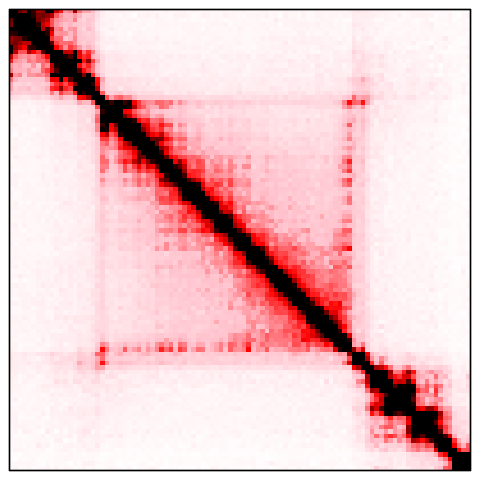

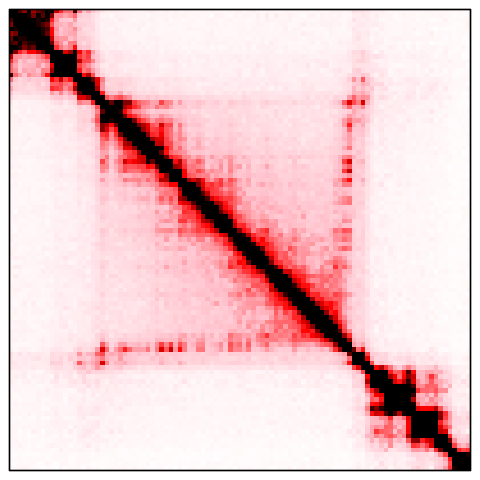

In [10]:
options(repr.plot.width=4,repr.plot.height=4)
#pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_GZ.chr14:81-89Mb_legend0-200.pdf",width=2,height=2)
Heatmap(GZ.chr14,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
#dev.off()
#pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_CP.chr14:81-89Mb_legend0-200.pdf",width=2,height=2)
Heatmap(CP.chr14,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
#dev.off()

### chr14:81-89Mb

In [41]:
CP.50.mat <- readRDS("./CP.50.raw.mat.RDS")
GZ.50.mat <- readRDS("./GZ.50.raw.mat.RDS")

In [42]:
CP.chr14 <- mySubMat("chr14",81000000,89000000,CP.50.mat,res=50000)
GZ.chr14 <- mySubMat("chr14",81000000,89000000,GZ.50.mat,res=50000)

In [43]:
CP.chr14[CP.chr14 >=200] <- 200
GZ.chr14[GZ.chr14 >=200] <- 200

In [45]:
options(repr.plot.width=4,repr.plot.height=4)
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_GZ.chr14:81-89Mb_legend0-200.pdf",width=2,height=2)
Heatmap(GZ.chr14,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_CP.chr14:81-89Mb_legend0-200.pdf",width=2,height=2)
Heatmap(CP.chr14,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

### chr13:50-65Mb

In [50]:
CP.chr13 <- mySubMat("chr13",53000000,62000000,CP.50.mat,res=50000)
GZ.chr13 <- mySubMat("chr13",53000000,62000000,GZ.50.mat,res=50000)

In [51]:
CP.chr13[CP.chr13 >=160] <- 160
GZ.chr13[GZ.chr13 >=160] <- 160

In [53]:
options(repr.plot.width=4,repr.plot.height=4)
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_GZ.chr13:53-62Mb_legend0-160.pdf",width=2,height=2)
Heatmap(GZ.chr13,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_CP.chr13:53-62Mb_legend0-160.pdf",width=2,height=2)
Heatmap(CP.chr13,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

# Macaca

In [94]:
mCP.50 <- lapply(c(1:20,"X"),function(idx){
    read.table(paste0("../macaca_BrainHiC_fromyt/all_CP_Hi-C.allValidPairs.hic.rawMAT/all_CP_Hi-C.allValidPairs.hic_",idx,"_KR.50kb.mat")) %>%
    mutate(seqnames=idx) 
})
mGZ.50 <- lapply(c(1:20,"X"),function(idx){
    read.table(paste0("../macaca_BrainHiC_fromyt/all_GZ_Hi-C.allValidPairs.hic.rawMAT/all_GZ_Hi-C.allValidPairs.hic_",idx,"_KR.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [98]:
mCP.50.mat <- do.call(rbind,mCP.50) %>% mutate(seqnames=paste0("chr",seqnames))
mGZ.50.mat <- do.call(rbind,mGZ.50) %>% mutate(seqnames=paste0("chr",seqnames))

In [99]:
mCP.50.mat <- mCP.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
mGZ.50.mat <- mGZ.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped
  data frame and adjust accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped
  data frame and adjust accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


In [100]:
saveRDS(mCP.50.mat,"../macaca_BrainHiC_fromyt/CP.50.raw.mat.RDS")
saveRDS(mGZ.50.mat,"../macaca_BrainHiC_fromyt/GZ.50.raw.mat.RDS")

### chr7:142.5-151Mb

In [59]:
mCP.50.mat <- readRDS("../macaca_BrainHiC_fromyt/CP.50.raw.mat.RDS")
mGZ.50.mat <- readRDS("../macaca_BrainHiC_fromyt/GZ.50.raw.mat.RDS")

In [60]:
mCP.chr7 <- mySubMat("chr7",142500000,151000000,mCP.50.mat,res=50000)
mGZ.chr7 <- mySubMat("chr7",142500000,151000000,mGZ.50.mat,res=50000)

In [61]:
mCP.chr7[mCP.chr7 >=30] <- 30
mGZ.chr7[mGZ.chr7 >=30] <- 30

In [63]:
options(repr.plot.width=4,repr.plot.height=4)
pdf("../../../FINAL_figures/fig2/macacaCortex_pubHiC_GZ.chr7:142.5-151Mb_legend0-30.pdf",width=2,height=2)
Heatmap(mGZ.chr7,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig2/macacaCortex_pubHiC_CP.chr7:142.5-151Mb_legend0-30.pdf",width=2,height=2)
Heatmap(mCP.chr7,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

# 10kb human

In [148]:
CP.10 <- lapply(c(2,3,14,17),function(idx){
    read.table(paste0("./CP_allValidPairs.hic.rawMAT/CP_allValidPairs.hic_",idx,"_KR.10kb.mat")) %>%
    mutate(seqnames=idx) 
})
GZ.10 <- lapply(c(2,3,14,17),function(idx){
    read.table(paste0("./GZ_allValidPairs.hic.rawMAT/GZ_allValidPairs.hic_",idx,"_KR.10kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [150]:
CP.10.mat <- do.call(rbind,CP.10) %>% mutate(seqnames=paste0("chr",seqnames))
GZ.10.mat <- do.call(rbind,GZ.10) %>% mutate(seqnames=paste0("chr",seqnames))

In [151]:
CP.10.mat <- CP.10.mat %>% filter(!is.na(V3)) %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
GZ.10.mat <- GZ.10.mat %>% filter(!is.na(V3)) %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


### chr14:81-89Mb

In [49]:
CP.10.chr14.1 <- mySubMat("chr14",81900000,83000000,CP.10.mat,res=10000)
GZ.10.chr14.1 <- mySubMat("chr14",81900000,83000000,GZ.10.mat,res=10000)

In [91]:
CP.10.chr14.2 <- mySubMat("chr14",85300000,86100000,CP.10.mat,res=10000)
GZ.10.chr14.2 <- mySubMat("chr14",85300000,86100000,GZ.10.mat,res=10000)

In [46]:
quantile(CP.10.chr14.1,.9)

90% 
5.421252

In [50]:
CP.10.chr14.1[CP.10.chr14.1 >=8] <- 8
GZ.10.chr14.1[GZ.10.chr14.1 >=8] <- 8

In [92]:
CP.10.chr14.2[CP.10.chr14.2 >=6] <- 6
GZ.10.chr14.2[GZ.10.chr14.2 >=6] <- 6
CP.10.chr14.2[CP.10.chr14.2 <=0.5] <- 0.5
GZ.10.chr14.2[GZ.10.chr14.2 <=0.5] <- 0.5

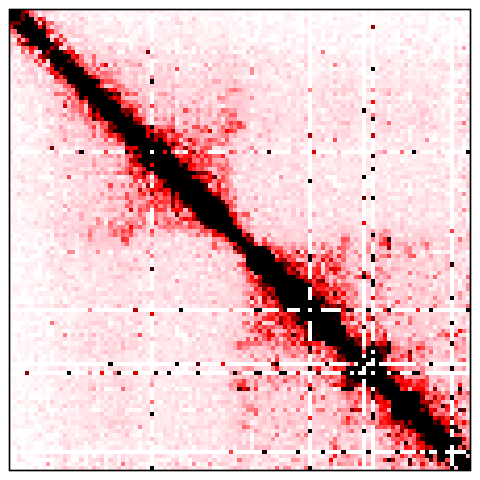

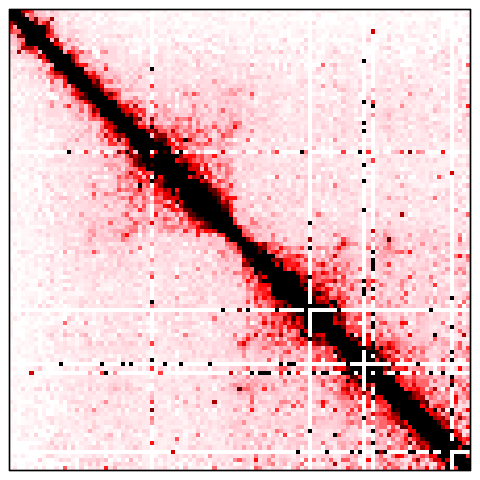

In [54]:
options(repr.plot.width=4,repr.plot.height=4)
Heatmap(GZ.10.chr14.1,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(CP.10.chr14.1,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

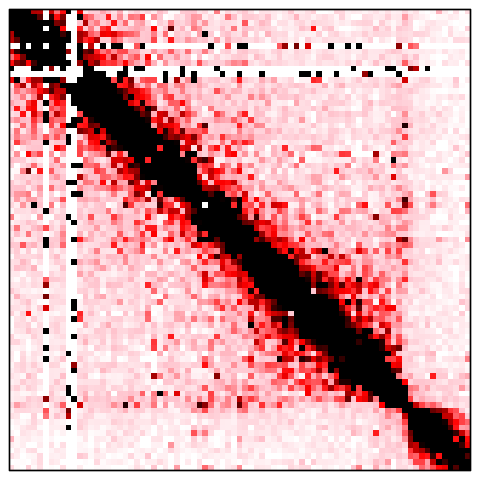

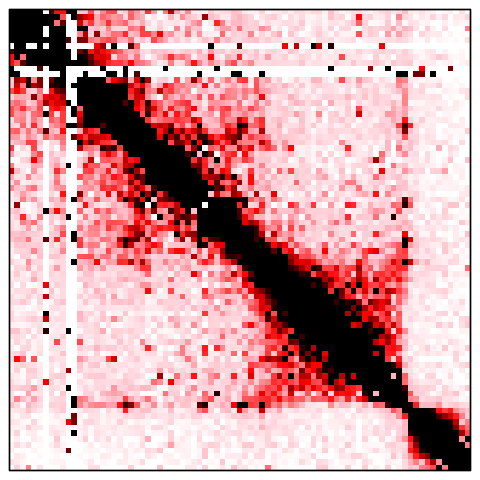

In [93]:
options(repr.plot.width=4,repr.plot.height=4)
Heatmap(GZ.10.chr14.2,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(CP.10.chr14.2,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

# human 25kb marker gene

In [180]:
CP.25 <- lapply(c(2,3,10,17),function(idx){
    read.table(paste0("./CP_allValidPairs.hic.rawMAT/CP_allValidPairs.hic_",idx,"_KR.25kb.mat")) %>%
    mutate(seqnames=idx) 
})
GZ.25 <- lapply(c(2,3,10,17),function(idx){
    read.table(paste0("./GZ_allValidPairs.hic.rawMAT/GZ_allValidPairs.hic_",idx,"_KR.25kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [181]:
CP.25.mat <- do.call(rbind,CP.25) %>% mutate(seqnames=paste0("chr",seqnames))
GZ.25.mat <- do.call(rbind,GZ.25) %>% mutate(seqnames=paste0("chr",seqnames))

In [182]:
CP.25.mat <- CP.25.mat %>% filter(!is.na(V3)) %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
GZ.25.mat <- GZ.25.mat %>% filter(!is.na(V3)) %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame and adjust
  accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


## SSTR2: chr17:71.1Mb

In [166]:
CP.25.SSTR2 <- mySubMat("chr17",70300000,71500000,CP.25.mat,res=25000)
GZ.25.SSTR2 <- mySubMat("chr17",70300000,71500000,GZ.25.mat,res=25000)

In [167]:
quantile(CP.25.SSTR2,.95)

95% 
83.99446

In [169]:
CP.25.SSTR2[CP.25.SSTR2 >=80] <- 80
GZ.25.SSTR2[GZ.25.SSTR2 >=80] <- 80

In [207]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_GZ.chr17:70.3-71.25Mb_legend0-80.pdf",width=2,height=2)
Heatmap(GZ.25.SSTR2,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_CP.chr17:70.3-71.25Mb_legend0-80.pdf",width=2,height=2)
Heatmap(CP.25.SSTR2,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

## VIM chr10

In [204]:
CP.25.VIM <- mySubMat("chr10",16500000,17700000,CP.25.mat,res=25000)
GZ.25.VIM <- mySubMat("chr10",16500000,17700000,GZ.25.mat,res=25000)

In [188]:
quantile(CP.25.VIM,.95)

95% 
50.50044

In [205]:
CP.25.VIM[CP.25.VIM >=45] <- 45
GZ.25.VIM[GZ.25.VIM >=45] <- 45

In [209]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_GZ.VIM.chr10:16.5-17.7.25Mb_legend0-45.pdf",width=2,height=2)
Heatmap(GZ.25.VIM,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_CP.VIM.chr10:16.5-17.7.25Mb_legend0-45.pdf",width=2,height=2)
Heatmap(CP.25.VIM,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

## SATB2 chr2

In [197]:
CP.25.SATB2 <- mySubMat("chr2",199000000,201000000,CP.25.mat,res=25000)
GZ.25.SATB2 <- mySubMat("chr2",199000000,201000000,GZ.25.mat,res=25000)

In [198]:
quantile(CP.25.SATB2,.95)

95% 
14.74129

In [199]:
CP.25.SATB2[CP.25.SATB2 >=14] <- 14
GZ.25.SATB2[GZ.25.SATB2 >=14] <- 14

In [210]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_GZ.SATB2.chr2:199-201.25Mb_legend0-14.pdf",width=2,height=2)
Heatmap(GZ.25.SATB2,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig2/humanBrainCortex_pubHiC_CP.SATB2.chr2:199-201.25Mb_legend0-14.pdf",width=2,height=2)
Heatmap(CP.25.SATB2,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

# Macaca 10kb

In [99]:
mCP.10 <- lapply(c(7),function(idx){
    read.table(paste0("../macaca_BrainHiC_fromyt/all_CP_Hi-C.allValidPairs.hic.rawMAT/all_CP_Hi-C.allValidPairs.hic_",idx,"_KR.10kb.mat")) %>%
    mutate(seqnames=idx) 
})
mGZ.10 <- lapply(c(7),function(idx){
    read.table(paste0("../macaca_BrainHiC_fromyt/all_GZ_Hi-C.allValidPairs.hic.rawMAT/all_GZ_Hi-C.allValidPairs.hic_",idx,"_KR.10kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [108]:
mCP.10.mat <- do.call(rbind,mCP.10) %>% mutate(seqnames=paste0("chr",seqnames))
mGZ.10.mat <- do.call(rbind,mGZ.10) %>% mutate(seqnames=paste0("chr",seqnames))

In [109]:
mCP.10.mat <- mCP.10.mat %>% filter(!is.na(V3)) %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
mGZ.10.mat <- mGZ.10.mat %>% filter(!is.na(V3)) %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame
  and adjust accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()` always returns an ungrouped data frame
  and adjust accordingly.”
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


### chr7:142.5-151Mb ##gene 147.7Mb

In [128]:
mCP.chr7.10kb <- mySubMat("chr7",145500000,147800000,mCP.10.mat,res=10000)
mGZ.chr7.10kb <- mySubMat("chr7",145500000,147800000,mGZ.10.mat,res=10000)

In [129]:
mCP.chr7.10kb[mCP.chr7.10kb >=3] <- 3
mGZ.chr7.10kb[mGZ.chr7.10kb >=3] <- 3

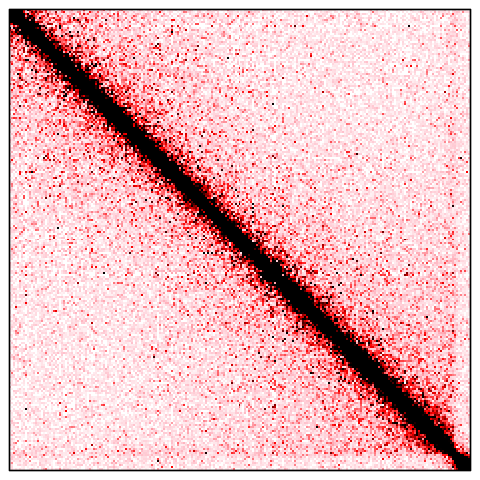

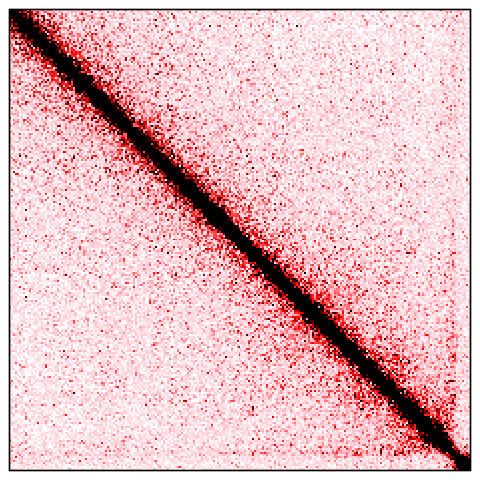

In [130]:
Heatmap(mGZ.chr7.10kb,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(mCP.chr7.10kb,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))